Fernando Nieto Rios 1930885                                                        
David Fernando Sustaita Zuñiga 1923518                                                                                                   
Alejandro Guadalupe Flores Mendoza 1665530


In [178]:
# importar librerías 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [179]:
import cv2
import glob
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [180]:
imagenes_full=[]
etiquetas_full =[]
num = 0

In [181]:
for m in "Ingenieria":
  path = glob.glob("/content/Ingenieria/" + str(num) + "/*.jpg")
  for n in path:
    test_image = cv2.imread(n, cv2.IMREAD_GRAYSCALE)
  
    # Formato de imagen
    img_resized = cv2.resize(test_image, (28, 28), interpolation=cv2.INTER_LINEAR)
    img_resized = cv2.bitwise_not(img_resized)

    #Guardar imagenes
    imagenes_full.append(img_resized)
    etiquetas_full.append(num)
  num +=1

In [182]:
len(imagenes_full)


290

In [183]:
clas_names = ["0", "1", "2", "3", "4",
              "5", "6", "7", "8", "9"]


290


Text(0.5, 0, '1')

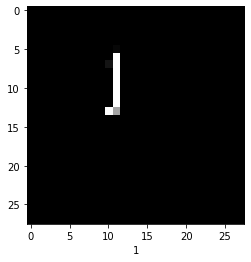

In [184]:
gde = len(imagenes_full)
plt.imshow(imagenes_full[30], cmap='gray')
print(gde)
plt.xlabel(etiquetas_full[30])

In [185]:
y = np.array(etiquetas_full)
X = np.array(imagenes_full, dtype=np.uint8)

In [186]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (232, 28, 28) (232,)
Testing data shape :  (58, 28, 28) (58,)


In [187]:
train_X = train_X / 255.
test_X = test_X / 255.

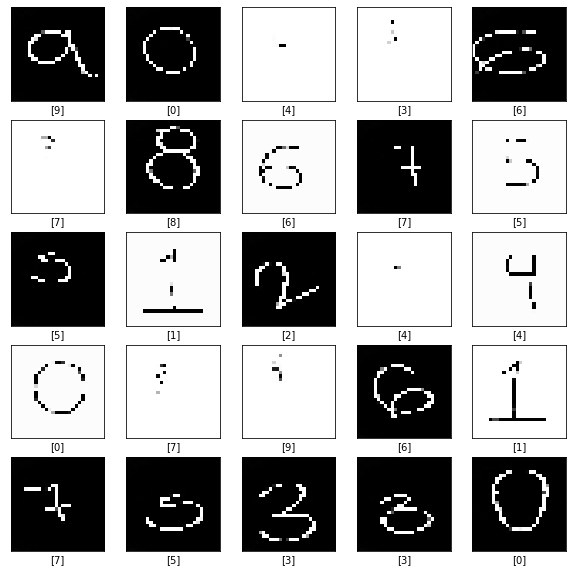

In [188]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    plt.xlabel([train_Y[i]])
plt.show()

In [189]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [190]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [191]:
history = model.fit(train_X, train_Y, epochs=10, validation_data=(test_X, test_Y))

Epoch 1/10
8/8 [==============================] - 1s 33ms/step - loss: 2.4612 - accuracy: 0.1207 - val_loss: 2.2535 - val_accuracy: 0.2241
Epoch 2/10
8/8 [==============================] - 0s 11ms/step - loss: 2.3918 - accuracy: 0.1810 - val_loss: 2.3117 - val_accuracy: 0.1724
Epoch 3/10
8/8 [==============================] - 0s 8ms/step - loss: 2.2660 - accuracy: 0.3319 - val_loss: 2.2718 - val_accuracy: 0.2759
Epoch 4/10
8/8 [==============================] - 0s 8ms/step - loss: 2.1960 - accuracy: 0.3966 - val_loss: 2.2091 - val_accuracy: 0.3276
Epoch 5/10
8/8 [==============================] - 0s 7ms/step - loss: 2.0876 - accuracy: 0.4698 - val_loss: 2.2200 - val_accuracy: 0.3621
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 2.0056 - accuracy: 0.4871 - val_loss: 2.0973 - val_accuracy: 0.4483
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 1.9776 - accuracy: 0.5129 - val_loss: 2.0693 - val_accuracy: 0.4483
Epoch 8/10
8/8 [================

In [192]:
test_loss, test_acc = model.evaluate(test_X,  test_Y, verbose=2)

print('\nTest accuracy:', test_acc)

2/2 - 0s - loss: 1.9820 - accuracy: 0.4655 - 33ms/epoch - 17ms/step

Test accuracy: 0.4655172526836395


2/2 - 0s - loss: 1.9820 - accuracy: 0.4655 - 21ms/epoch - 10ms/step


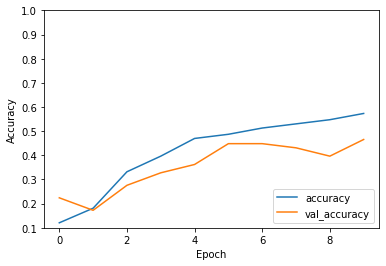

In [193]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_X,  test_Y, verbose=2)

In [194]:
predictions = model.predict(test_X)

2/2 [==============================] - 0s 5ms/step


# ***`PRIMERA PREDICCION`***

In [195]:
predictions[5]


array([0.09920378, 0.14209591, 0.08353267, 0.08319802, 0.11666234,
       0.08463763, 0.08880042, 0.09796727, 0.08735342, 0.11654854],
      dtype=float32)

In [196]:
np.argmax(predictions[5])

1

In [197]:
test_Y[5]

2

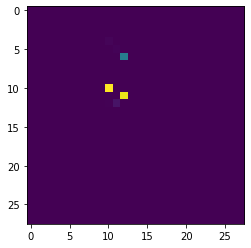

In [198]:
plt.imshow(test_X[5])

# ***`SEGUNDA PREDICCION`***

In [199]:
predictions[10]

array([0.07603021, 0.05602649, 0.05153928, 0.03717077, 0.05014073,
       0.03067376, 0.53677887, 0.04512524, 0.06323082, 0.05328377],
      dtype=float32)

In [200]:
np.argmax(predictions[10])

6

In [201]:
test_Y[10]

6

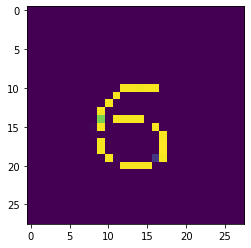

In [202]:
plt.imshow(test_X[10])

# ***`TERCERA PREDICCION`***

In [204]:
predictions[30]

array([0.07970216, 0.11094394, 0.04293381, 0.04316107, 0.05771276,
       0.27257106, 0.06501298, 0.04967061, 0.1756014 , 0.10269027],
      dtype=float32)

In [205]:
np.argmax(predictions[30])

5

In [207]:
test_Y[30]

5

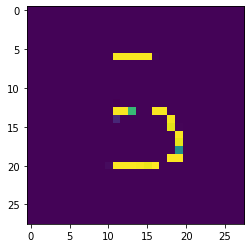

In [208]:

plt.imshow(test_X[30])